In [1]:
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

In [2]:
non_perturbed_dataset = 'standard'
datasets = [
    'rotated'
] 
noise_pcts = [10,20,30,40,50,60,70,80,90,95,96,97,98,99,100]
noise_pcts = [10,20,30,40,50,60,70,80,90,100]

FONT_SIZE=14
TICK_FONT_SIZE=14
mpl.rcParams['xtick.labelsize'] = TICK_FONT_SIZE
mpl.rcParams['ytick.labelsize'] = TICK_FONT_SIZE

In [3]:
def get_baseline_results(method, dataset, data_size='small'):
    # need to build array of results for noise pcts
    num_preds = []
    num_preds_stds = []
    
    # get standard
    np_0 = json.loads(open('../'+method+'/'+data_size+'/standard.json').read())
    num_preds.append(np_0['noise_pct_0']['interpretability']['num_predicates']['mean'])
    num_preds_stds.append(np_0['noise_pct_0']['interpretability']['num_predicates']['std_err'])
    
    # other noise pcts
    np_res = json.loads(open('../'+method+'/'+data_size+'/'+dataset+'.json').read())
    for n in noise_pcts:
        num_preds.append(np_res['noise_pct_'+str(n)]['interpretability']['num_predicates']['mean'])
        num_preds_stds.append(np_res['noise_pct_'+str(n)]['interpretability']['num_predicates']['std_err'])
    return num_preds, num_preds_stds

In [4]:
def get_high_baseline_results(method, dataset, data_size='small'):
    # need to build array of results for noise pcts
    num_preds = []
    num_preds_stds = []
    
    # other noise pcts
    np_res = json.loads(open('../'+method+'/'+data_size+'/'+dataset+'.json').read())
    for n in noise_pcts:
        if n > 70:
            num_preds.append(np_res['noise_pct_'+str(n)]['interpretability']['num_predicates']['mean'])
            num_preds_stds.append(np_res['noise_pct_'+str(n)]['interpretability']['num_predicates']['std_err'])
    return num_preds, num_preds_stds

In [5]:
def get_nsl_results(net_type, dataset):        
    # need to build array of results for noise pcts
    num_preds = []
    num_preds_stds = []
    
    # get standard
    np_0 = json.loads(open('../nsl/structured_test_data/'+net_type+'/standard_interpretability.json').read())
    num_preds.append(np_0['noise_pct_0']['interpretability']['num_predicates']['mean'])
    num_preds_stds.append(np_0['noise_pct_0']['interpretability']['num_predicates']['std_err'])
    
    # other noise pcts
    np_res = json.loads(open('../nsl/structured_test_data/'+net_type+'/'+dataset+'_interpretability.json').read())    
    for n in noise_pcts:
        num_preds.append(np_res['noise_pct_'+str(n)]['interpretability']['num_predicates']['mean'])
        num_preds_stds.append(np_res['noise_pct_'+str(n)]['interpretability']['num_predicates']['std_err'])
    return num_preds, num_preds_stds

In [6]:
def get_high_nsl_results(net_type, dataset):        
    # need to build array of results for noise pcts
    num_preds = []
    num_preds_stds = []

    # other noise pcts
    np_res = json.loads(open('../nsl/structured_test_data/'+net_type+'/'+dataset+'_interpretability.json').read())    
    for n in noise_pcts:
        if n > 70:
            num_preds.append(np_res['noise_pct_'+str(n)]['interpretability']['num_predicates']['mean'])
            num_preds_stds.append(np_res['noise_pct_'+str(n)]['interpretability']['num_predicates']['std_err'])
    return num_preds, num_preds_stds

In [7]:
def get_pct_symbolic_perturbs(net_type, deck):
    def format_pct(x):
        return math.floor(x*100)
    pcts = []
    # get standard
    std_perturbs = json.loads(open('../mislabelled_example_analysis/'+net_type+'/standard.json').read())
    pcts.append(format_pct(std_perturbs['noise_pct_0']['pct_incorrect_examples']))
    pct_symbolic_perturbs = json.loads(open('../mislabelled_example_analysis/'+net_type+'/'+deck+'.json').read())
    for n in noise_pcts:
        pcts.append(format_pct(pct_symbolic_perturbs['noise_pct_'+str(n)]['pct_incorrect_examples']))
    return pcts

# Interpretability

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
[37.0, 44.8, 49.0, 50.6, 59.8, 66.8, 67.0, 61.2, 60.2, 70.8, 71.0]


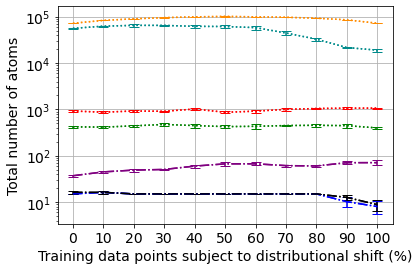

In [8]:
fig, ax = plt.subplots()

nps_x = [0]+noise_pcts
i=0
# NSL
nsl, nsl_err = get_nsl_results('softmax', datasets[i])
ax.plot(nps_x, nsl, label = "NSL Softmax 320 examples", color="b", linestyle='-.')
ax.errorbar(nps_x, nsl, yerr=nsl_err, color="b", capsize=5,linestyle='-.')

# EDL-GEN
nsl, nsl_err = get_nsl_results('edl_gen', datasets[i])
ax.plot(nps_x, nsl, label = "NSL EDL-GEN 320 examples", color="k", linestyle='-.')
ax.errorbar(nps_x, nsl, yerr=nsl_err, color="k", capsize=5,linestyle='-.')

nsl_acc, nsl_err = get_nsl_results('reduced_background_knowledge', datasets[i])
print(nps_x)
print(nsl_acc)
to_plot = []
for x in nsl_acc:
    if x == 0:
        to_plot.append(0.00001)
    else:
        to_plot.append(x)
ax.plot(nps_x, to_plot, label = "NSL EDL-GEN (reduced bk) 320 examples", color="purple", linestyle='-.')
ax.errorbar(nps_x, to_plot, yerr=nsl_err, color="purple", capsize=5,linestyle='-.')

# Random Forest Small
rf, rf_err = get_baseline_results('rf', datasets[i])
ax.plot(nps_x, rf, label = "Baseline RF 320 examples", color="r", linestyle=':')
ax.errorbar(nps_x, rf, yerr=rf_err, color="r", capsize=5, linestyle=':')

# # Random Forest Large
rf, rf_err = get_baseline_results('rf', datasets[i], data_size='large')
ax.plot(nps_x, rf, label = "Baseline RF 32,000 examples", color="darkorange", linestyle=':')
ax.errorbar(nps_x, rf, yerr=rf_err, color="darkorange", capsize=5, linestyle=':')

# CNN-LSTM Small
fcn, fcn_err = get_baseline_results('cnn_lstm', datasets[i])
ax.plot(nps_x, fcn, label = "Baseline CNN-LSTM 320 examples", color="g", linestyle=':')
ax.errorbar(nps_x, fcn, yerr=fcn_err, color="g", capsize=5, linestyle=':')

# CNN-LSTM Large
fcn, fcn_err = get_baseline_results('cnn_lstm', datasets[i], data_size='large')
ax.plot(nps_x, fcn, label = "Baseline CNN-LSTM 32,000 examples", color="darkcyan", linestyle=':')
ax.errorbar(nps_x, fcn, yerr=fcn_err, color="darkcyan", capsize=5, linestyle=':')

# Twin Axes to denote pct symbolic perturbations
# pct_symbolic_perturbs_softmax = get_pct_symbolic_perturbs('softmax', datasets[i])
# pct_symbolic_perturbs_edl_gen = get_pct_symbolic_perturbs('edl_gen', datasets[i])
#     ax2 = axes[i].twiny()

ax.set_xticks(nps_x)
#axes[i].set_yticks(np.arange(0.45,1.01,0.05))
ax.set_xlabel('Training data points subject to distributional shift (%)', fontsize=FONT_SIZE)
ax.set_ylabel('Total number of atoms', fontsize=FONT_SIZE)
ax.set_yscale('log')
#     axes[i].set_title(datasets[i])
ax.grid(True)
    
    
plt.savefig('sudoku_4x4_interpretability_results.pdf', format='pdf', bbox_inches='tight')
plt.show()

# 80-100%

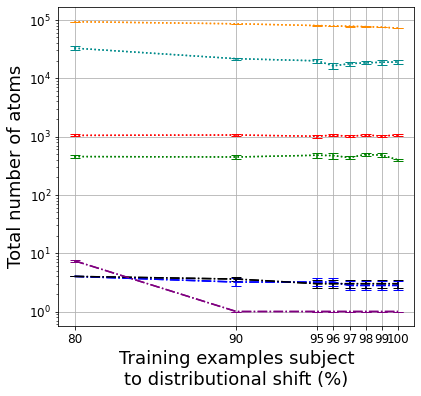

In [9]:
fig2 = plt.figure(constrained_layout=True, figsize=(16,10))
spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
# f2_ax2 = fig2.add_subplot(spec2[0, 1])

axes = [f2_ax1]

# nps_x = [0]+noise_pcts
nps_x = [80,90,95,96,97,98,99,100]
for i in range(1):
    # NSL
    nsl, nsl_err = get_high_nsl_results('softmax', datasets[i])
    axes[i].plot(nps_x, nsl, label = "NSL Softmax 320 examples", color="b", linestyle='-.')
    axes[i].errorbar(nps_x, nsl, yerr=nsl_err, color="b", capsize=5,linestyle='-.')
    
    # EDL-GEN
    nsl, nsl_err = get_high_nsl_results('edl_gen', datasets[i])
    axes[i].plot(nps_x, nsl, label = "NSL EDL-GEN 320 examples", color="k", linestyle='-.')
    axes[i].errorbar(nps_x, nsl, yerr=nsl_err, color="k", capsize=5,linestyle='-.')
    
    nsl_acc, nsl_err = get_high_nsl_results('reduced_background_knowledge', datasets[i])
    axes[i].plot(nps_x, nsl_acc, label = "NSL EDL-GEN (reduced bk) 320 examples", color="purple", linestyle='-.')
    axes[i].errorbar(nps_x, nsl_acc, yerr=nsl_err, color="purple", capsize=5,linestyle='-.')
    
    # Random Forest Small
    rf, rf_err = get_high_baseline_results('rf', datasets[i])
    axes[i].plot(nps_x, rf, label = "Baseline RF 320 examples", color="r", linestyle=':')
    axes[i].errorbar(nps_x, rf, yerr=rf_err, color="r", capsize=5, linestyle=':')
    
    # Random Forest Large
    rf, rf_err = get_high_baseline_results('rf', datasets[i], data_size='large')
    axes[i].plot(nps_x, rf, label = "Baseline RF 32,000 examples", color="darkorange", linestyle=':')
    axes[i].errorbar(nps_x, rf, yerr=rf_err, color="darkorange", capsize=5, linestyle=':')
    
    # CNN-LSTM Small
    fcn, fcn_err = get_high_baseline_results('cnn_lstm', datasets[i])
    axes[i].plot(nps_x, fcn, label = "Baseline CNN-LSTM 320 examples", color="g", linestyle=':')
    axes[i].errorbar(nps_x, fcn, yerr=fcn_err, color="g", capsize=5, linestyle=':')
    
    # CNN-LSTM Large
    fcn, fcn_err = get_high_baseline_results('cnn_lstm', datasets[i], data_size='large')
    axes[i].plot(nps_x, fcn, label = "Baseline CNN-LSTM 32,000 examples", color="darkcyan", linestyle=':')
    axes[i].errorbar(nps_x, fcn, yerr=fcn_err, color="darkcyan", capsize=5, linestyle=':')
    
    # Twin Axes to denote pct symbolic perturbations
    pct_symbolic_perturbs_softmax = get_pct_symbolic_perturbs('softmax', datasets[i])
    pct_symbolic_perturbs_edl_gen = get_pct_symbolic_perturbs('edl_gen', datasets[i])
#     ax2 = axes[i].twiny()
    
    axes[i].set_xticks(nps_x)
    #axes[i].set_yticks(np.arange(0.45,1.01,0.05))
    axes[i].set_xlabel('Training examples subject\nto distributional shift (%)', fontsize=FONT_SIZE)
    axes[i].set_ylabel('Total number of atoms', fontsize=FONT_SIZE)
    axes[i].set_yscale('log')
#     axes[i].set_title(datasets[i])
    axes[i].grid(True)
    

    
# Set legend
# f2_ax2.legend(*axes[0].get_legend_handles_labels(), loc='center')
# f2_ax2.get_xaxis().set_visible(False)
# f2_ax2.get_yaxis().set_visible(False)
# f2_ax2.set_title('Legend')
# plt.savefig('sudoku_interpretability_results.pdf', format='pdf', bbox_inches='tight')
plt.show()